In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.data import Dataset

from src.datasets.zinc_pairs import ZincPairs
from src.datasets.zinc_smiles_generation import ZincSmiles


def analyze_dataset(ds: Dataset, name: str = "", feature_attr: str = "x") -> dict:
    """
    Compute statistics for a PyG dataset and plot side-by-side distribution of data.k
    for positive (y=1) and negative (y=0) graphs.
    """
    # --- collect k values ---
    pos_ks, neg_ks = [], []
    for d in ds:
        if int(d.y.item()) == 1:
            pos_ks.append(int(d.k.item()))
        else:
            neg_ks.append(int(d.k.item()))

    pos_k_counter = Counter(pos_ks)
    neg_k_counter = Counter(neg_ks)

    # union of all ks
    all_labels = sorted(set(pos_k_counter) | set(neg_k_counter))
    pos_counts = [pos_k_counter.get(k, 0) for k in all_labels]
    neg_counts = [neg_k_counter.get(k, 0) for k in all_labels]

    summary = {
        "dataset": name,
        "num_graphs": len(ds),
        "unique_k": len(all_labels),
        "pos_k_distribution": dict(pos_k_counter),
        "neg_k_distribution": dict(neg_k_counter),
    }

    print(f"{name}: {len(ds)} graphs, {len(all_labels)} unique k values")

    # --- side-by-side bar plot ---
    x = np.arange(len(all_labels))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, pos_counts, width, label="positive (y=1)", color="royalblue", edgecolor="black")
    ax.bar(x + width/2, neg_counts, width, label="negative (y=0)", color="darkorange", edgecolor="black")

    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation=90)
    ax.set_xlabel("k")
    ax.set_ylabel("count")
    ax.set_title(f"{name} – Distribution of k by label")
    ax.legend()

    plt.tight_layout()
    plt.show()

    return summary


test: 2152453 graphs, 36 unique k values


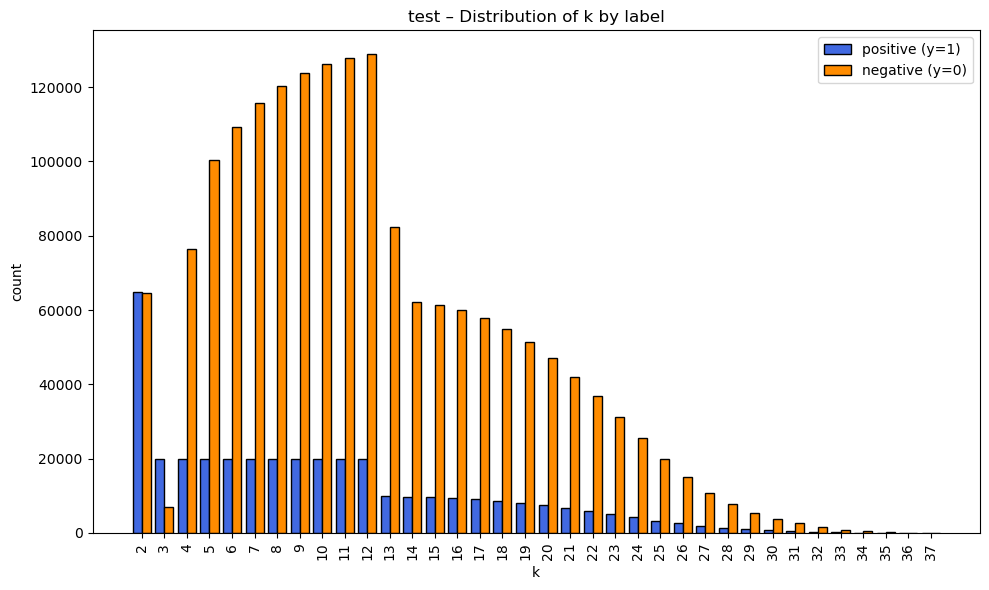

{'dataset': 'test',
 'neg_k_distribution': {2: 64707,
                        3: 6899,
                        4: 76391,
                        5: 100339,
                        6: 109314,
                        7: 115638,
                        8: 120420,
                        9: 123682,
                        10: 126140,
                        11: 127848,
                        12: 128844,
                        13: 82302,
                        14: 62104,
                        15: 61317,
                        16: 59984,
                        17: 57858,
                        18: 55025,
                        19: 51452,
                        20: 47088,
                        21: 42044,
                        22: 36879,
                        23: 31210,
                        24: 25444,
                        25: 19789,
                        26: 15129,
                        27: 10873,
                        28: 7689,
                        29: 5465,
   

In [4]:
from src.datasets.zinc_pairs_v3 import ZincPairsV3
from pprint import pprint

for split in ["test"]:
    ds = ZincPairsV3(split=split, base_dataset=ZincSmiles(split=split))
    stats = analyze_dataset(ds, name=split)
    pprint(stats)